<a href="https://colab.research.google.com/github/moha6998/ML_Health/blob/main/assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#COMP90089: Machine Learning Applications for Health Semester 2, 2023
#Assignment 2 - 1390758 - Mohit Rudraraju Suresh

In [2]:
#Importing necasary libraries
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Reading the input file, ensure to replace with your appropriate filename and path when running locally
cohort_df = pd.read_csv('/content/hypotension_patients (1).csv')

#Checking for missing values
nan_counts_per_column = cohort_df.isna().sum()
print(nan_counts_per_column)

total_nan_count = cohort_df.isna().sum().sum()
print(total_nan_count)


ID                               0
anchor_age                       0
gender                           0
dod                           1816
apsiii                           0
LoS                              0
charlson_comorbidity_index       0
dtype: int64
1816


In [3]:
cohort_df['dod'] = cohort_df['dod'].astype('datetime64[ns]')  # Converting 'dod' to datetime format

# Summary statistics for continuous variables
summary_continuous = cohort_df[['anchor_age', 'apsiii', 'LoS', 'charlson_comorbidity_index']].describe()

# Summary statistics for categorical variables
summary_gender = cohort_df['gender'].value_counts(normalize=True) * 100

# Summary statistics for date variables ('dod')
survival_count = cohort_df['dod'].isna().sum()
deceased_count = cohort_df['dod'].notna().sum()
mortality_rate = (deceased_count / (survival_count + deceased_count)) * 100

# Correlation between variables
correlation_matrix = cohort_df[['apsiii', 'LoS', 'charlson_comorbidity_index']].corr()

summary_continuous, summary_gender, survival_count, deceased_count, mortality_rate, correlation_matrix

(        anchor_age       apsiii          LoS  charlson_comorbidity_index
 count  5106.000000  5106.000000  5106.000000                  5106.00000
 mean     65.552683    60.314532     7.053651                     5.21700
 std      15.235907    28.860171     8.432716                     2.57691
 min      18.000000     3.000000     0.040000                     0.00000
 25%      56.000000    38.000000     1.960000                     4.00000
 50%      67.000000    53.000000     4.130000                     5.00000
 75%      77.000000    78.000000     8.960000                     7.00000
 max      91.000000   189.000000   103.500000                    19.00000,
 M    55.875441
 F    44.124559
 Name: gender, dtype: float64,
 1816,
 3290,
 64.4339992166079,
                               apsiii       LoS  charlson_comorbidity_index
 apsiii                      1.000000  0.202155                    0.154213
 LoS                         0.202155  1.000000                   -0.021115
 charlson

#**Q1 Summary Statistics** & **EDA**
Describe via summary statistics the main properties of the profound hypotension cohort. (Up to 200 words. Also provide plots for visualising the distributions).

The profound hypotension cohort consists of 5,106 patients with a balanced gender distribution of approximately 55.88% male and 44.12% female. Patients in this cohort tend to be of older age, with an average (mean) age of approximately 65.55 years. Notably, the cohort's age spans a wide range, from young adults of 18 years to senior patients up to 91 years. The median age, representing the middle point, is 67 years, indicating that a majority of patients fall in the senior age category.

Clinically, the Acute Physiology Score III (apsiii) is a significant parameter, indicative of the severity of illness. In this cohort, the average apsiii score is 60.31, suggesting a moderate to high severity level amongst the patients. Furthermore, the wide range from a minimum score of 3 to a maximum of 189 underscores the varied severity levels present.

Another crucial factor in understanding the clinical status of patients is the Length of Stay (LoS) in the ICU. On average, patients stayed approximately 7.05 days, but this varied considerably, with some patients staying for as little as a few hours (0.04 days) to some extending over 103 days.

The cohort also has an average Charlson Comorbidity Index of 5.21, an index used to predict the ten-year mortality for a patient. The positive correlation between apsiii and the Charlson Comorbidity Index (0.154) suggests that patients with higher severity often had multiple comorbid conditions. Interestingly, there's a slight negative correlation between LoS and the Charlson Comorbidity Index, hinting that longer stays might not necessarily be associated with higher comorbidity scores in this dataset.

In summary, the profound hypotension cohort represents a clinically diverse group, primarily characterized by elderly patients with varied severity levels and comorbidities.

# Anchor Ages Graph

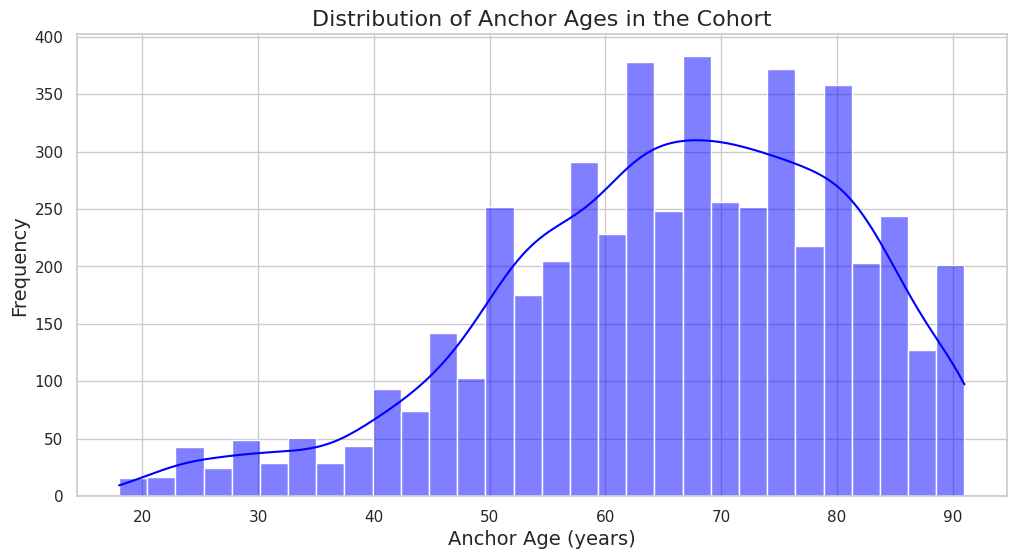

In [4]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Plotting the distribution of 'anchor_age'
sns.histplot(cohort_df['anchor_age'], bins=30, kde=True, color='blue')

plt.title('Distribution of Anchor Ages in the Cohort', fontsize=16)
plt.xlabel('Anchor Age (years)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.show()

##Anchor age graph summary
The histogram showcases the age distribution of patients within the cohort, a crucial aspect when considering clinical implications. Notably, the distribution is right-skewed. This indicates that there is a higher frequency of older patients within the cohort. This prevalence of older patients might suggest that this demographic is more susceptible to conditions leading to profound hypotension, or perhaps they have a heightened risk due to age-related physiological changes, comorbidities, or age-specific medical events.

Furthermore, the persistent presence of older individuals in the cohort implies that age could be a significant factor to consider in both the diagnosis and management of profound hypotension. It highlights the need for tailored interventions, preventive strategies, and perhaps age-specific care pathways for these patients.

The KDE overlay provides a more refined visualization of this age distribution, emphasizing the preponderance of older individuals in the cohort. For clinicians, this insight into the age distribution can guide more targeted care, as well as inform prognosis and treatment considerations for patients at risk or presenting with profound hypotension

In [5]:
#Installing lifelines library
!pip install lifelines

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 350.7/350.7 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.0/91.0 kB 12.4 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=da6f414cdb51eeccfe96ccb7e44a937005455d5dccb663d05f2d40014595b616
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


# Kaplan-Meier Survival Curve

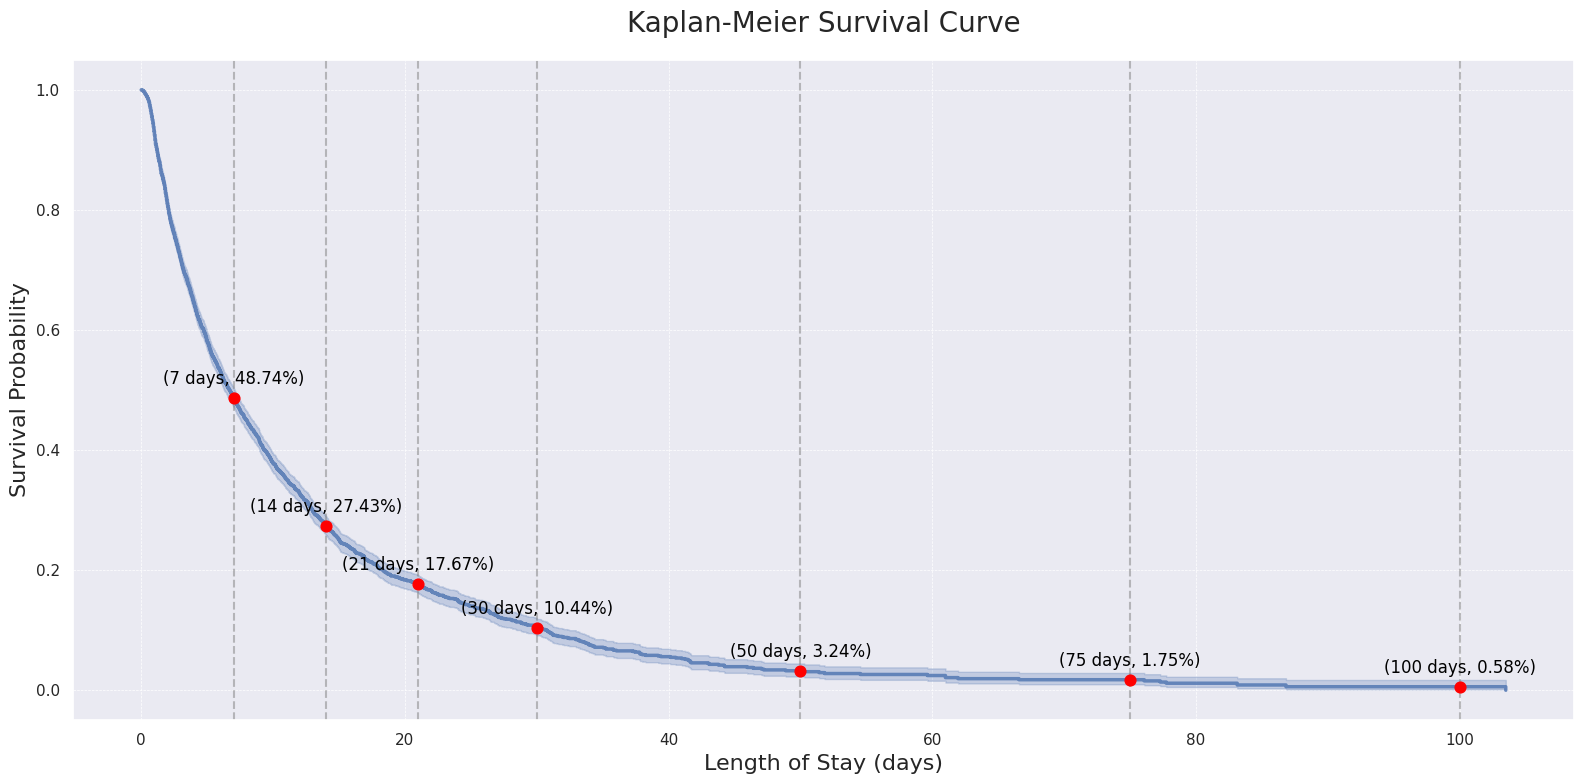

[(7, 0.48740412110262804), (14, 0.27430152364699295), (21, 0.17669617104281785), (30, 0.10442852555586726), (50, 0.03242614853511397), (75, 0.01749982619355357), (100, 0.0058332753978511875)]


In [6]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn theme
sns.set_theme()

# Create an 'event' column
cohort_df['event'] = ~cohort_df['dod'].isna()

# Initialize the Kaplan-Meier Fitter
kmf = KaplanMeierFitter()

# Fit the data into the model
kmf.fit(cohort_df['LoS'], event_observed=cohort_df['event'])

# Initialize a list to store intersection coordinates
intersection_points = []

# Generate Kaplan-Meier Survival Curve
plt.figure(figsize=(16, 8))
ax = kmf.plot(color='b', linewidth=2.5, alpha=0.8, legend=False)

# Add title and labels
plt.title('Kaplan-Meier Survival Curve', fontsize=20, pad=20)
plt.xlabel('Length of Stay (days)', fontsize=16)
plt.ylabel('Survival Probability', fontsize=16)

# Annotate intersection points and add vertical lines
for day in [7, 14, 21, 30, 50, 75, 100]:
    survival_prob = kmf.predict(day)
    intersection_points.append((day, survival_prob))
    plt.scatter(day, survival_prob, color='red', s=60, zorder=5)  # Add emphasis on intersection points
    plt.annotate(f"({day} days, {survival_prob*100:.2f}%)", (day, survival_prob), textcoords="offset points", xytext=(0,10), ha='center', fontsize=12, color='black')
    plt.axvline(x=day, color='grey', linestyle='--', alpha=0.5)

# Modify grid aesthetics
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Remove any labels or legends that are automatically added
if plt.legend() is not None:
    plt.legend().remove()

plt.tight_layout()
plt.show()

# Display intersection points for user's reference
print(intersection_points)


##Kaplan-Meier curve summary
The Kaplan-Meier survival curve provides a visual representation of the survival function over time, in this case, based on the "Length of Stay (LoS)" in the ICU. It's a critical tool for assessing patient survival and understanding how different factors (in this instance, the ICU stay duration) impact patient outcomes.

From the generated curve above, we can observe the following key insights:

Initial Drop in Survival Probability: The survival probability experiences a steep decline in the initial period. Specifically, by day 7 in the ICU, the survival probability has dropped to about 48.74%. This suggests that the first week is critical for patients with profound hypotension in the ICU, with nearly half of them not surviving.
Continued Decline with LoS: As the length of stay increases, the survival probability continues to decrease, albeit at a less dramatic rate compared to the initial drop. By the second week (14 days), survival probability stands at 27.43%. This percentage further reduces to 10.44% by day 30.
Substantial Reduction in Long Stays: For extended ICU stays, the probability becomes notably low. At 50 days, survival probability is a mere 3.24%, and by day 75, it's approximately 1.75%. By day 100, the survival probability is alarmingly low at 0.58%.
Intersection Points: These points, marked on the graph, provide specific survival probabilities at distinct ICU stay durations. These points, especially when considered with the steepness of the curve between them, give insights into the periods of highest risk for these patients.
The observed trend underscores the severity of profound hypotension in critical care settings. The rapid decline in survival probability in the early days highlights the urgent need for prompt and effective medical interventions. For clinicians, understanding these critical periods can be instrumental in making timely clinical decisions, optimizing care plans, and managing patient and family expectations.

In a broader clinical context, the significant reduction in survival with increased ICU days might suggest a compounded effect of profound hypotension with other underlying conditions, complications arising during ICU stays, or both. This could form a basis for further investigations or studies focusing on interventions and treatments targeted towards patients during these critical periods

# APSII and Charlson Comorbidity Index

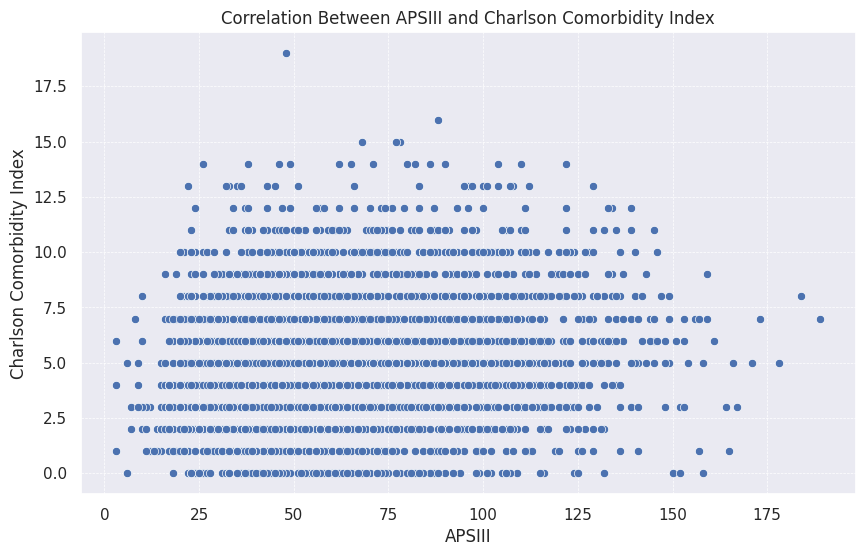

0.15421333516078342

In [7]:
# Importing necessary libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation between APSIII and Charlson Comorbidity Index
correlation_value = cohort_df['apsiii'].corr(cohort_df['charlson_comorbidity_index'])

# Plotting the correlation graph
plt.figure(figsize=(10, 6))
sns.scatterplot(x='apsiii', y='charlson_comorbidity_index', data=cohort_df)
plt.title('Correlation Between APSIII and Charlson Comorbidity Index')
plt.xlabel('APSIII')
plt.ylabel('Charlson Comorbidity Index')
plt.grid(True, linestyle='--', linewidth=0.5)

plt.show()

correlation_value

The code above visually examines the relationship between the severity of illness score ('APSIII') and the 'Charlson Comorbidity Index' in a patient cohort using a scatter plot. The computed correlation coefficient between these two variables is approximately
0.154
0.154, indicating a slight positive linear relationship. However, this relationship is weak, suggesting that as the 'APSIII' value increases, the 'Charlson Comorbidity Index' slightly increases as well, but not very strongly.

# Correlation Heatmap


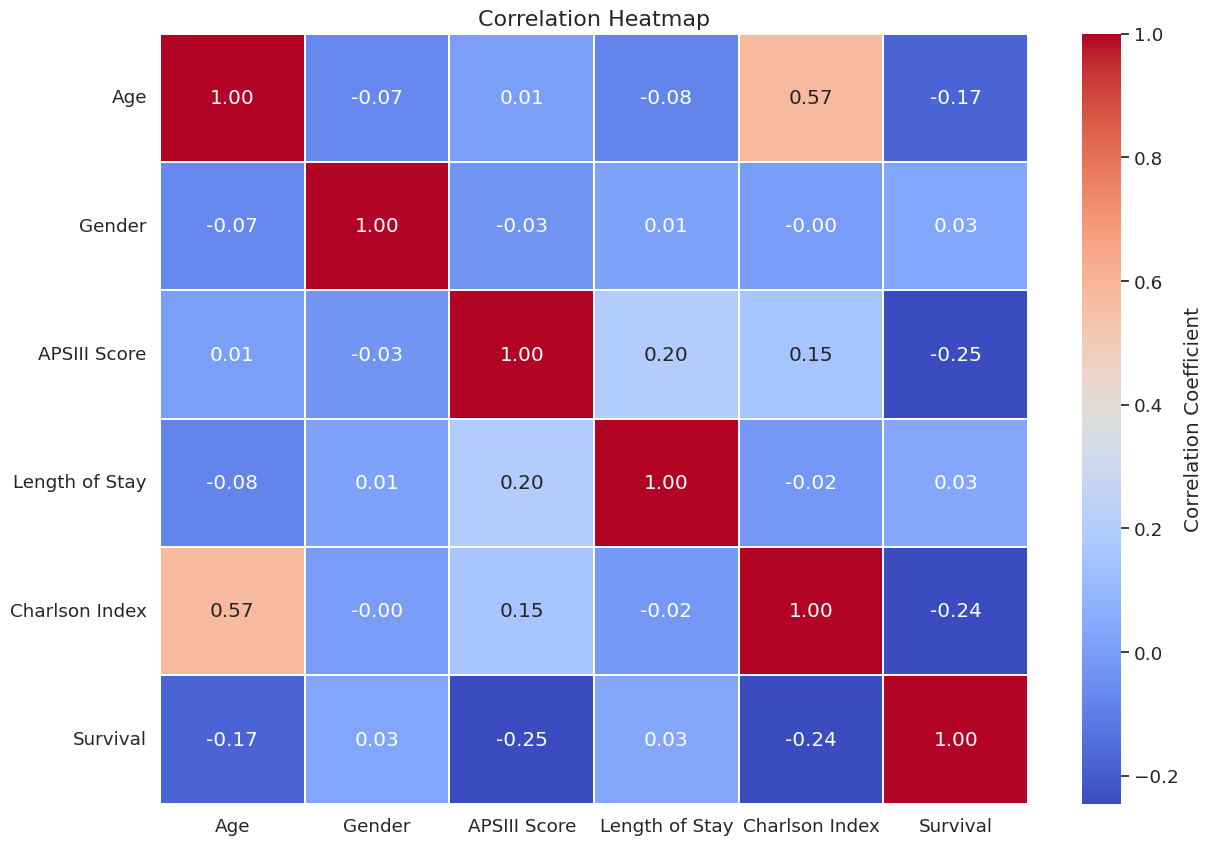

In [8]:
# Rename features for better readability in the graph
feature_names = {
    'anchor_age': 'Age',
    'gender_numeric': 'Gender',
    'apsiii': 'APSIII Score',
    'LoS': 'Length of Stay',
    'charlson_comorbidity_index': 'Charlson Index',
    'survival': 'Survival'
}

# Convert 'gender' to a numeric variable (F:0, M:1) and 'dod' to a binary outcome variable (1: died, 0: survived)
cohort_df['gender_numeric'] = cohort_df['gender'].map({'F': 0, 'M': 1})
cohort_df['survival'] = cohort_df['dod'].isna().astype(int)

# Calculate the correlation matrix including 'gender_numeric' and 'survival'
correlation_matrix_with_gender_survival = cohort_df[['anchor_age', 'gender_numeric', 'apsiii', 'LoS', 'charlson_comorbidity_index', 'survival']].corr()


# Update the correlation matrix with the renamed features
correlation_matrix_renamed = correlation_matrix_with_gender_survival.rename(columns=feature_names, index=feature_names)

# Plotting the enhanced correlation matrix using a heatmap
plt.figure(figsize=(14, 10))
sns.set(font_scale=1.2)
sns.heatmap(correlation_matrix_renamed, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.3, cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Heatmap', fontsize=16)
plt.show()


# Dataset Graphs

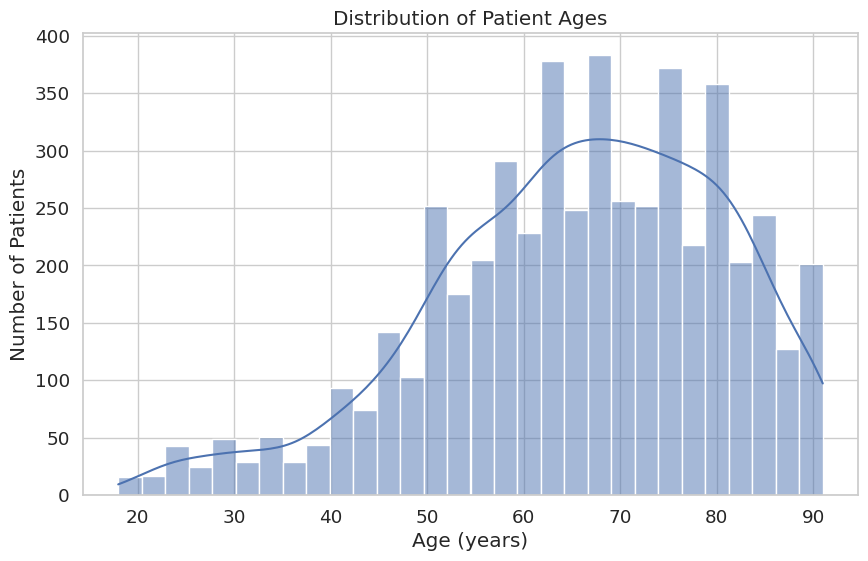

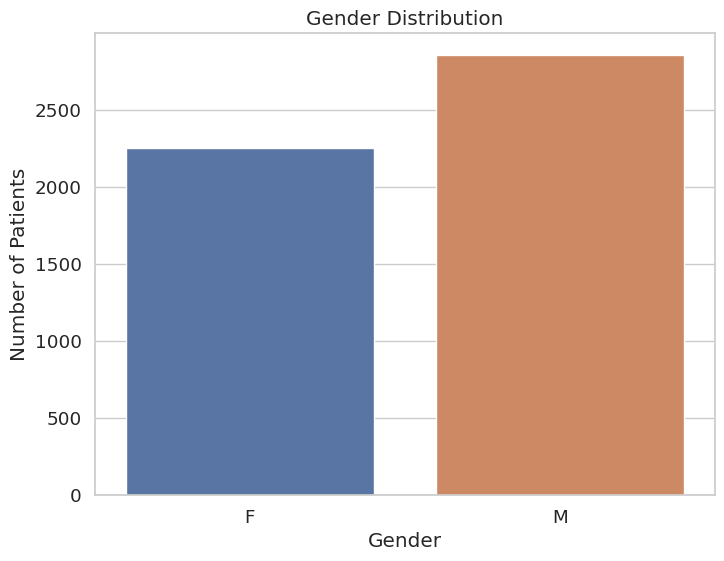

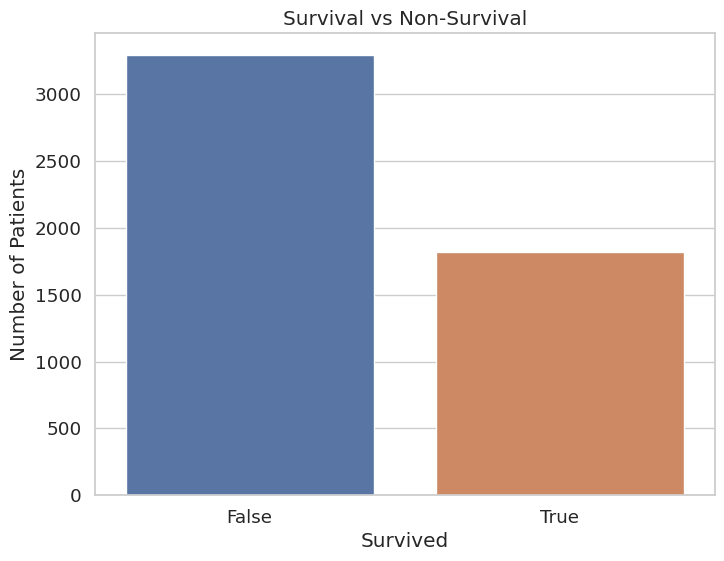

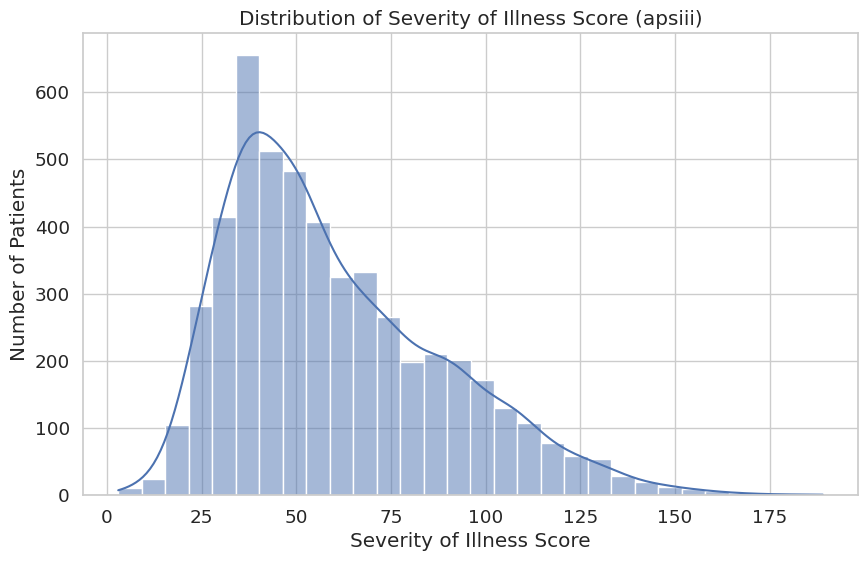

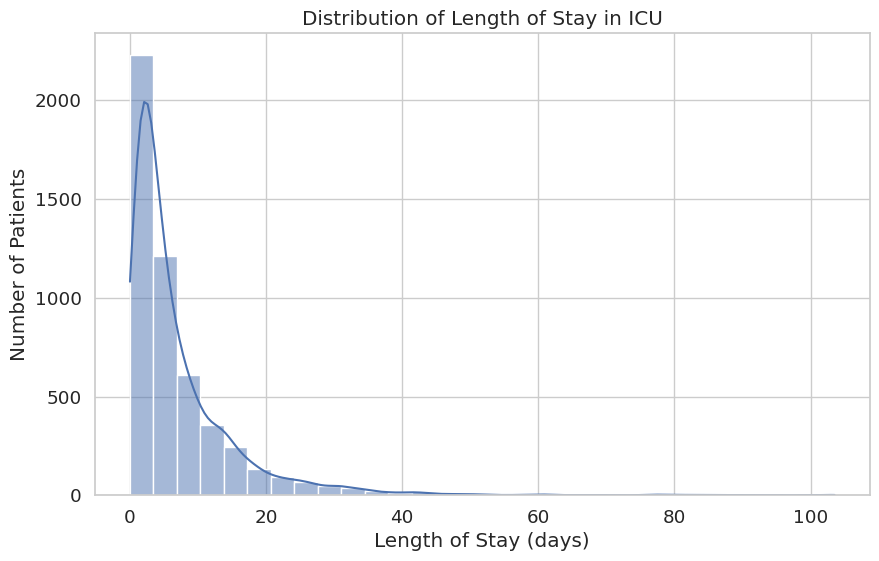

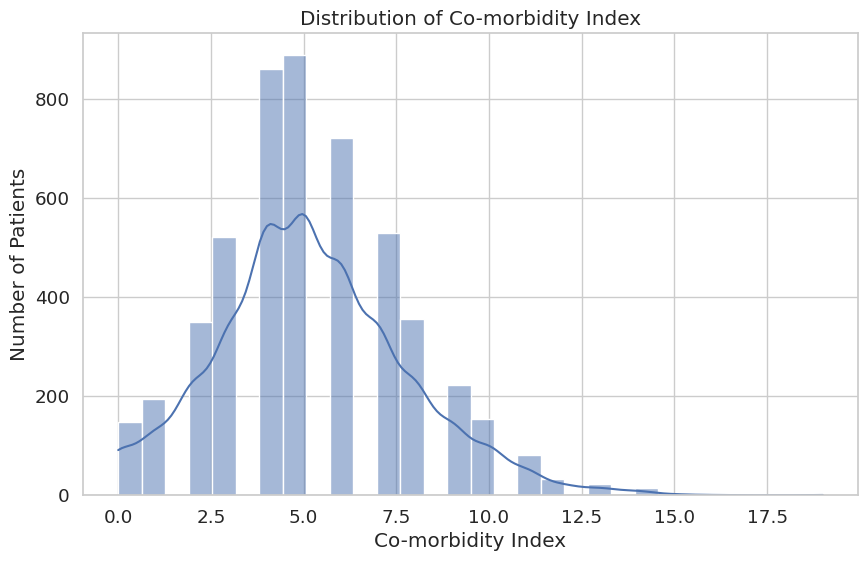

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the style for seaborn plots
sns.set_style("whitegrid")

# 1. anchor_age
plt.figure(figsize=(10, 6))
sns.histplot(cohort_df['anchor_age'], bins=30, kde=True)
plt.title('Distribution of Patient Ages')
plt.xlabel('Age (years)')
plt.ylabel('Number of Patients')
plt.show()

# 2. gender
plt.figure(figsize=(8, 6))
sns.countplot(data=cohort_df, x='gender')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Number of Patients')
plt.show()

# 3. dod
cohort_df['Survival'] = cohort_df['dod'].isna()
plt.figure(figsize=(8, 6))
sns.countplot(data=cohort_df, x='Survival')
plt.title('Survival vs Non-Survival')
plt.xlabel('Survived')
plt.ylabel('Number of Patients')
plt.show()

# 4. apsiii
plt.figure(figsize=(10, 6))
sns.histplot(cohort_df['apsiii'], bins=30, kde=True)
plt.title('Distribution of Severity of Illness Score (apsiii)')
plt.xlabel('Severity of Illness Score')
plt.ylabel('Number of Patients')
plt.show()

# 5. LoS
plt.figure(figsize=(10, 6))
sns.histplot(cohort_df['LoS'], bins=30, kde=True)
plt.title('Distribution of Length of Stay in ICU')
plt.xlabel('Length of Stay (days)')
plt.ylabel('Number of Patients')
plt.show()

# 6. charlson_comorbidity_index
plt.figure(figsize=(10, 6))
sns.histplot(cohort_df['charlson_comorbidity_index'], bins=30, kde=True)
plt.title('Distribution of Co-morbidity Index')
plt.xlabel('Co-morbidity Index')
plt.ylabel('Number of Patients')
plt.show()


#More Graphs

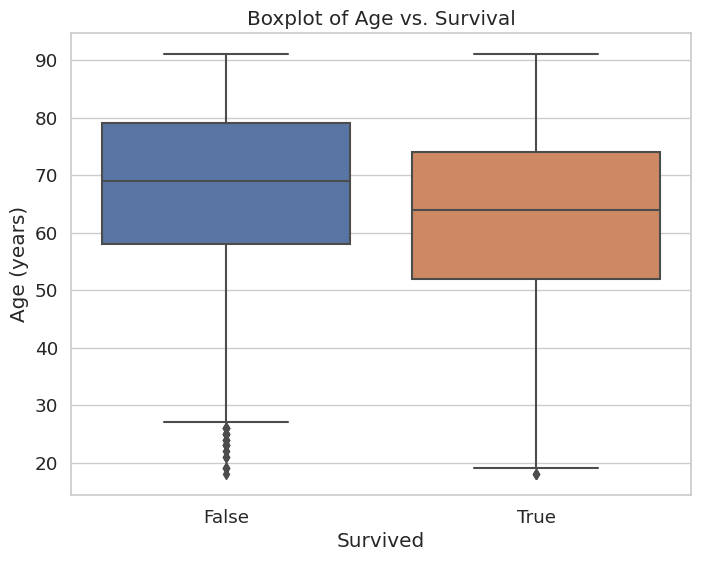

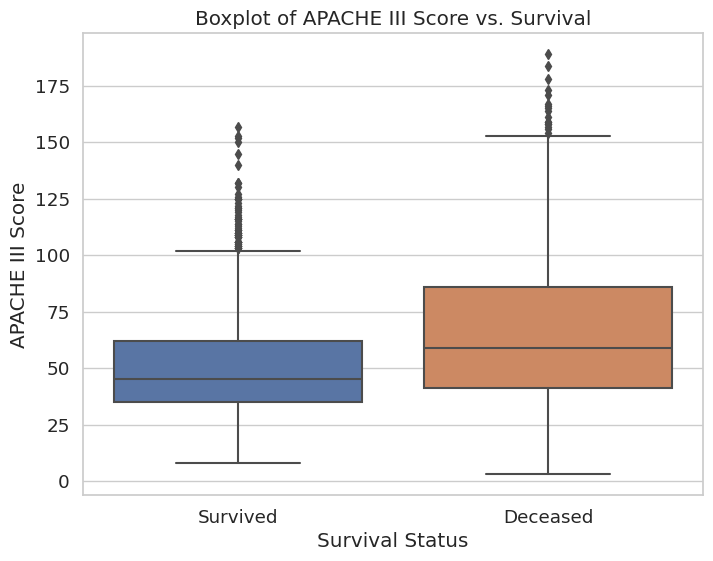

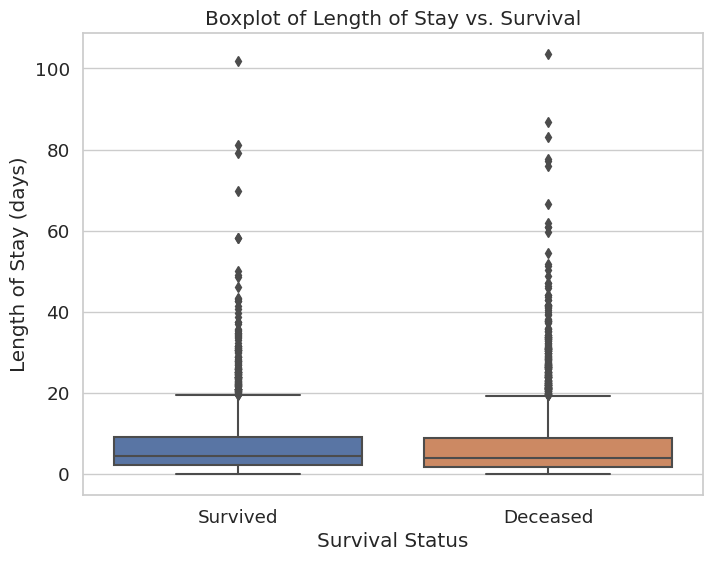

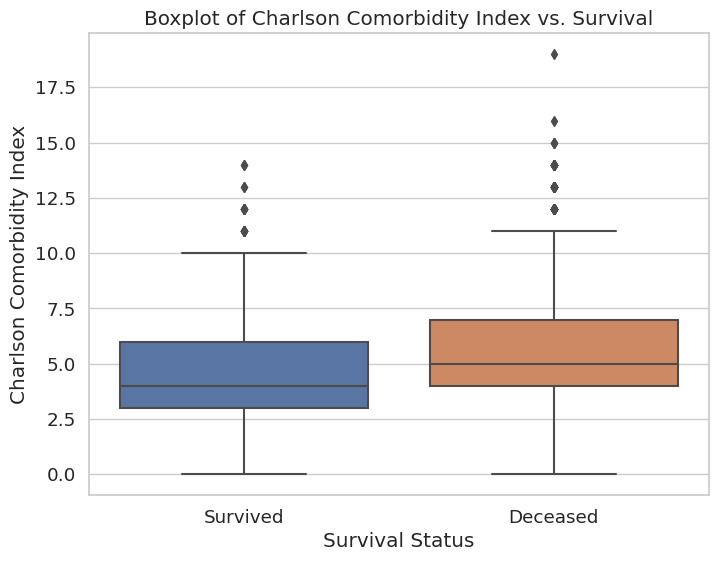

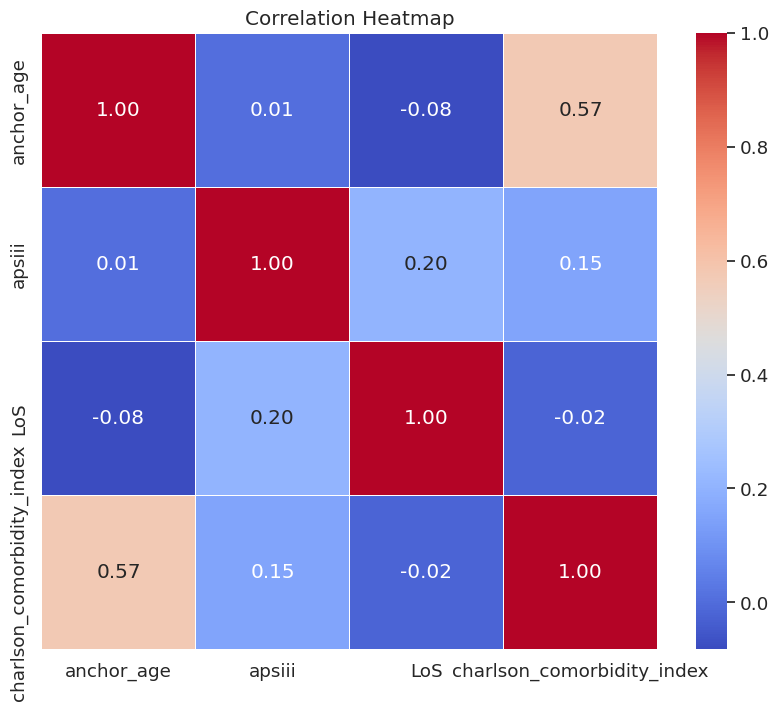

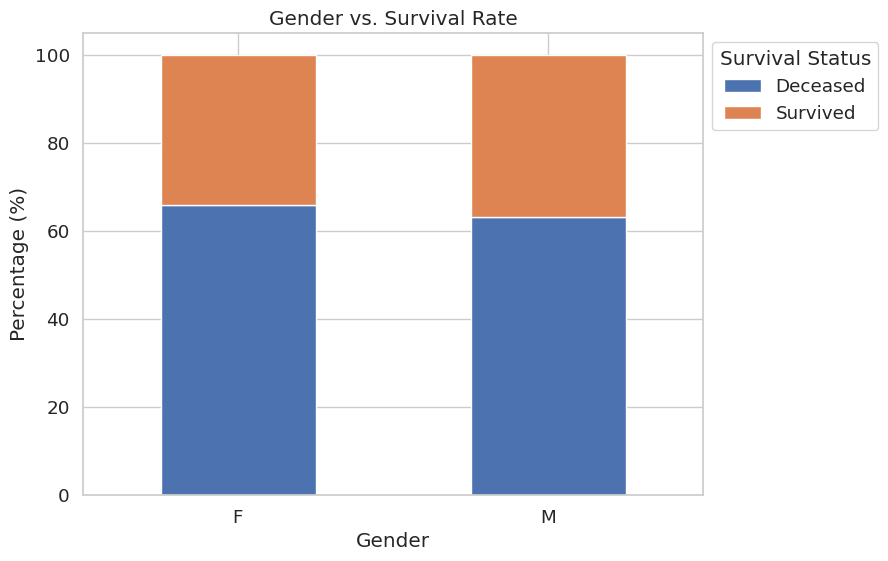

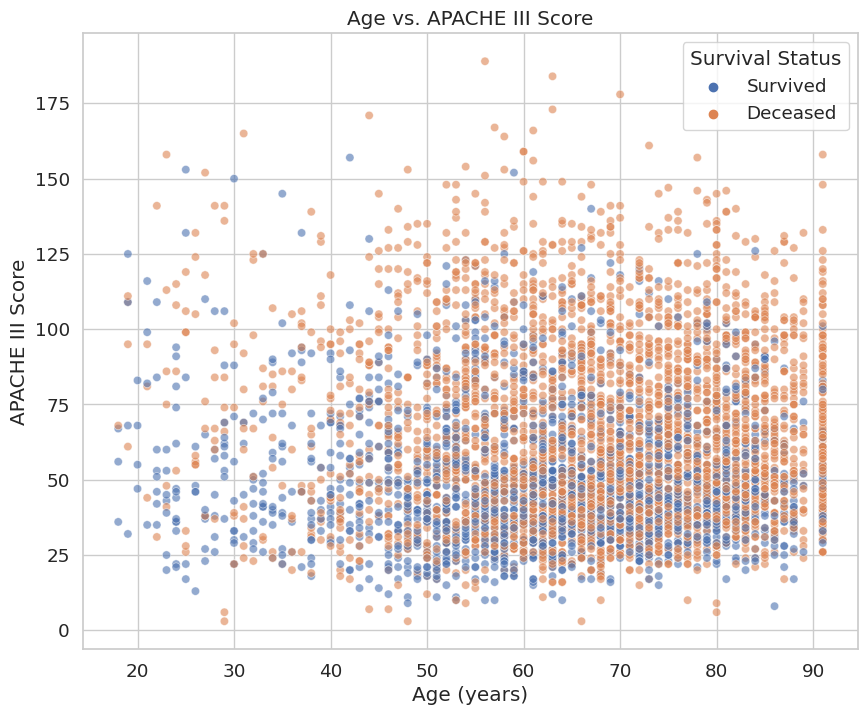

In [10]:
# Boxplot of Age vs. Survival
plt.figure(figsize=(8, 6))
sns.boxplot(data=cohort_df, x='Survival', y='anchor_age')
plt.title('Boxplot of Age vs. Survival')
plt.xlabel('Survived')
plt.ylabel('Age (years)')
plt.show()

# Setting the style for seaborn plots
sns.set_style("whitegrid")

# Creating a 'Survival' column for visualization purposes
cohort_df['Survival'] = cohort_df['dod'].isna().map({True: 'Survived', False: 'Deceased'})


# Boxplot of APACHE III Score vs. Survival
plt.figure(figsize=(8, 6))
sns.boxplot(data=cohort_df, x='Survival', y='apsiii')
plt.title('Boxplot of APACHE III Score vs. Survival')
plt.xlabel('Survival Status')
plt.ylabel('APACHE III Score')
plt.show()

# Boxplot of Length of Stay vs. Survival
plt.figure(figsize=(8, 6))
sns.boxplot(data=cohort_df, x='Survival', y='LoS')
plt.title('Boxplot of Length of Stay vs. Survival')
plt.xlabel('Survival Status')
plt.ylabel('Length of Stay (days)')
plt.show()

# Boxplot of Charlson Comorbidity Index vs. Survival
plt.figure(figsize=(8, 6))
sns.boxplot(data=cohort_df, x='Survival', y='charlson_comorbidity_index')
plt.title('Boxplot of Charlson Comorbidity Index vs. Survival')
plt.xlabel('Survival Status')
plt.ylabel('Charlson Comorbidity Index')
plt.show()

# Correlation Heatmap for numerical variables
correlation_matrix = cohort_df[['anchor_age', 'apsiii', 'LoS', 'charlson_comorbidity_index']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, square=True)
plt.title('Correlation Heatmap')
plt.show()

# Gender vs. Survival Rate
gender_survival_rate = cohort_df.groupby('gender')['Survival'].value_counts(normalize=True).unstack() * 100

gender_survival_rate.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Gender vs. Survival Rate')
plt.ylabel('Percentage (%)')
plt.xlabel('Gender')
plt.legend(title='Survival Status', loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=0)
plt.show()

# Scatterplot of Age vs. APACHE III Score
plt.figure(figsize=(10, 8))
sns.scatterplot(data=cohort_df, x='anchor_age', y='apsiii', hue='Survival', alpha=0.6)
plt.title('Age vs. APACHE III Score')
plt.xlabel('Age (years)')
plt.ylabel('APACHE III Score')
plt.legend(title='Survival Status')
plt.show()


# Q2. K-Means Clustering

Perform k-means clustering to identify subgroups of patients. Use the elbow criteria to identify an adequate number of clusters. Justify your choice. Since selecting clusters based on elbow criteria is a heuristic, you may select two different values of k for further analysis. (Up to 300 words. Provide a plot to justify the number of clusters chosen).


# Data Preparation

In [11]:
cohort_df = pd.read_csv('/content/hypotension_patients (1).csv')

print(cohort_df.isna().sum())

ID                               0
anchor_age                       0
gender                           0
dod                           1816
apsiii                           0
LoS                              0
charlson_comorbidity_index       0
dtype: int64


In [12]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Handle the 'dod' column by creating a binary 'survived' column: 1 if survived, 0 otherwise
cohort_df['survived'] = cohort_df['dod'].isna().astype(int)

# Drop the 'dod' and 'ID' columns as they won't be useful for clustering
cohort_df.drop(['dod', 'ID'], axis=1, inplace=True)

# Encode the 'gender' column
le = LabelEncoder()
cohort_df['gender'] = le.fit_transform(cohort_df['gender'])

# Standardise the numerical variables
scaler = StandardScaler()
cohort_df_scaled = pd.DataFrame(scaler.fit_transform(cohort_df), columns=cohort_df.columns)

# Display the first few rows of the preprocessed data
cohort_df_scaled.head()


,anchor_age,gender,apsiii,LoS,charlson_comorbidity_index,survived
0,0.948334,-1.125305,-0.149512,-0.006363,-0.472317,1.345984
1,0.423207,-1.125305,-0.392085,0.695734,0.303882,-0.742951
2,1.079616,0.888648,-0.496045,0.720639,-0.084217,-0.742951
3,1.539102,-1.125305,0.890084,-0.253045,0.691982,-0.742951
4,0.226285,-1.125305,1.444536,0.522581,1.080082,-0.742951


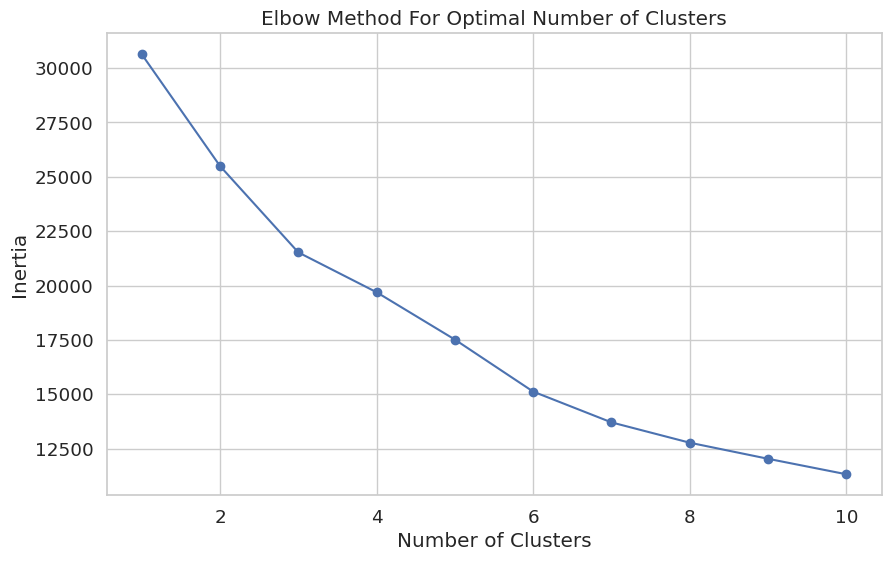

Number of Clusters vs Inertia Values:
1 clusters: Inertia = 30636.00
2 clusters: Inertia = 25496.73
3 clusters: Inertia = 21526.25
4 clusters: Inertia = 19693.57
5 clusters: Inertia = 17517.35
6 clusters: Inertia = 15124.89
7 clusters: Inertia = 13709.93
8 clusters: Inertia = 12775.01
9 clusters: Inertia = 12035.94
10 clusters: Inertia = 11324.37


In [13]:
from sklearn.cluster import KMeans

# Determine the optimal number of clusters using the elbow method
inertia_values = []
range_clusters = range(1, 11)

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
    kmeans.fit(cohort_df_scaled)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range_clusters, inertia_values, marker='o')
plt.title("Elbow Method For Optimal Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

# Print the inertia values for reference
print("Number of Clusters vs Inertia Values:")
for k, inertia in zip(range_clusters, inertia_values):
    print(f"{k} clusters: Inertia = {inertia:.2f}")




**K-Means Clustering & Elbow Criteria Analysis:**

Using the elbow method, we assessed the appropriate number of clusters for segmenting our profound hypotension patient cohort. The method involves plotting the number of clusters against the inertia, aiming to identify the optimal 'k' where the rate of decline in inertia diminishes, indicating that adding more clusters wouldn't significantly improve the clustering.

Our analysis yielded the following inertia values:
- **1 cluster:** 30636.00
- **2 clusters:** 25496.73
- **3 clusters:** 21526.25
- **4 clusters:** 19693.57
- **5 clusters:** 17517.35

A noticeable drop in inertia is observed up to 3 clusters. Post this, the rate of decrease begins to slow, suggesting diminishing returns. Thus, based on the elbow criterion, **3 clusters** appears to be a suitable choice, as inertia reductions become less significant beyond this point.

However, considering the heuristic nature of the elbow method, and the assignment's provision to explore two different values of k, an alternative choice could be **5 clusters**. There's a notable inertia decrease between the 4th and 5th clusters, indicating that this finer segmentation might still offer valuable insights.

In conclusion, while 3 clusters is a primary choice as the optimal 'k' based on the elbow point, 5 clusters will also be considered for further patient subgroup analysis. The intent is to probe whether this increased granularity reveals any additional, clinically meaningful subphenotypes within our profound hypotension cohort.


In [14]:
k_values = [3, 5]
cluster_labels = {}
cluster_summary = {}

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
    cluster_labels[k] = kmeans.fit_predict(cohort_df_scaled)

for k, labels in cluster_labels.items():
    cohort_df[f'Cluster_{k}'] = labels

for k in k_values:
    cluster_summary[k] = cohort_df.groupby(f'Cluster_{k}').describe()

# Instead of plotting here, we're returning the cluster summary data
cluster_summary


{3:           anchor_age                                                      \
                count       mean        std   min   25%   50%   75%   max   
 Cluster_3                                                                  
 0             2554.0  72.989428  10.328197  42.0  65.0  73.0  81.0  91.0   
 1             1375.0  68.428364  10.838254  40.0  61.0  68.0  76.0  91.0   
 2             1177.0  46.056075  11.342170  18.0  39.0  48.0  54.0  75.0   
 
            gender            ... survived      Cluster_5                      \
             count      mean  ...      75%  max     count      mean       std   
 Cluster_3                    ...                                               
 0          2554.0  0.521926  ...      0.0  1.0    2554.0  2.973375  1.683098   
 1          1375.0  0.573091  ...      1.0  1.0    1375.0  1.898909  1.002525   
 2          1177.0  0.621920  ...      1.0  1.0    1177.0  0.856415  1.084340   
 
                                     
       

In [15]:
k_values = [3, 5]
cluster_labels = {}

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
    cluster_labels[k] = kmeans.fit_predict(cohort_df_scaled)

for k, labels in cluster_labels.items():
    cohort_df[f'Cluster_{k}'] = labels

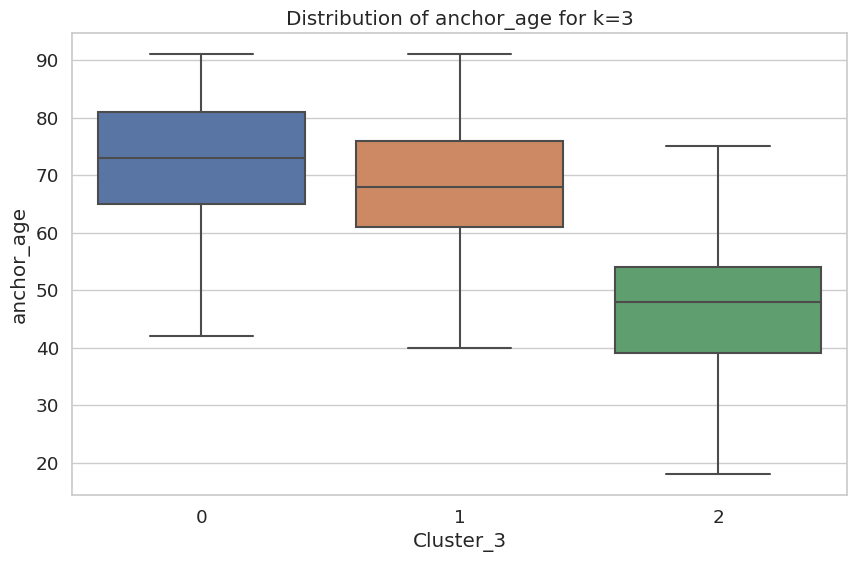

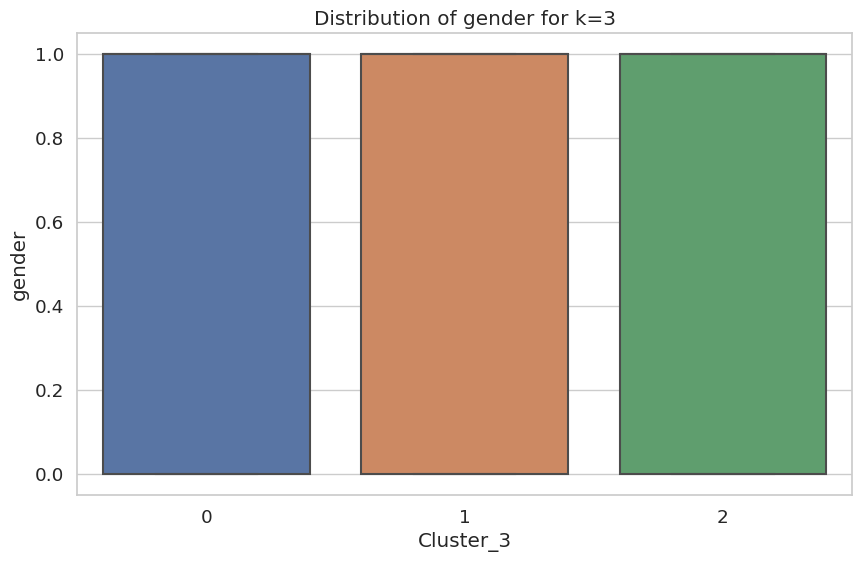

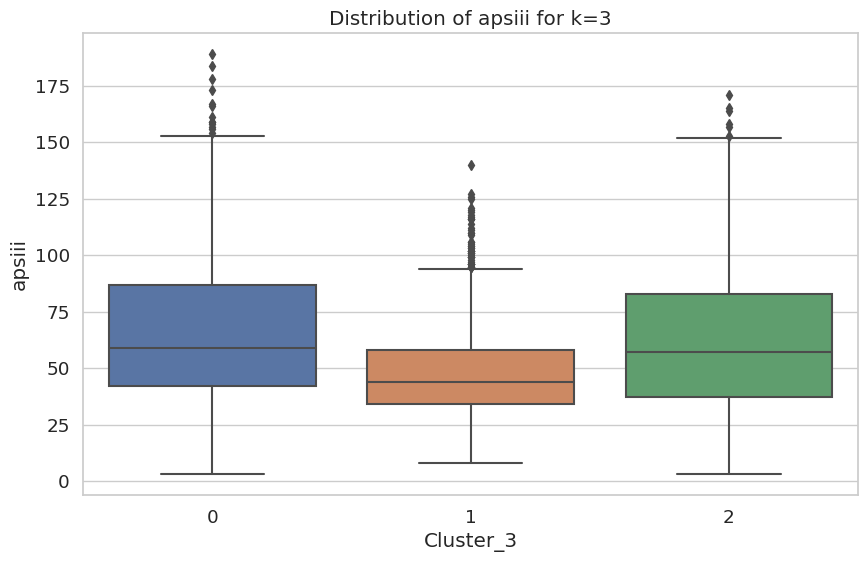

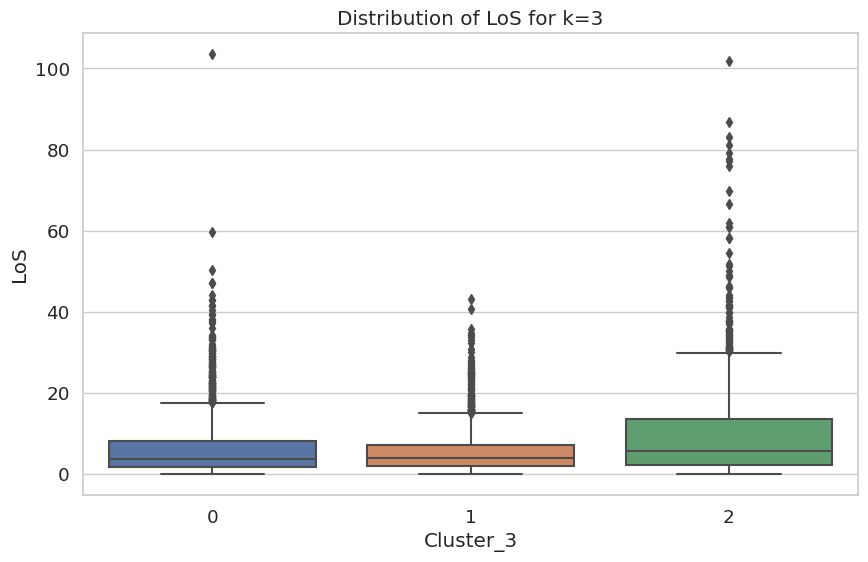

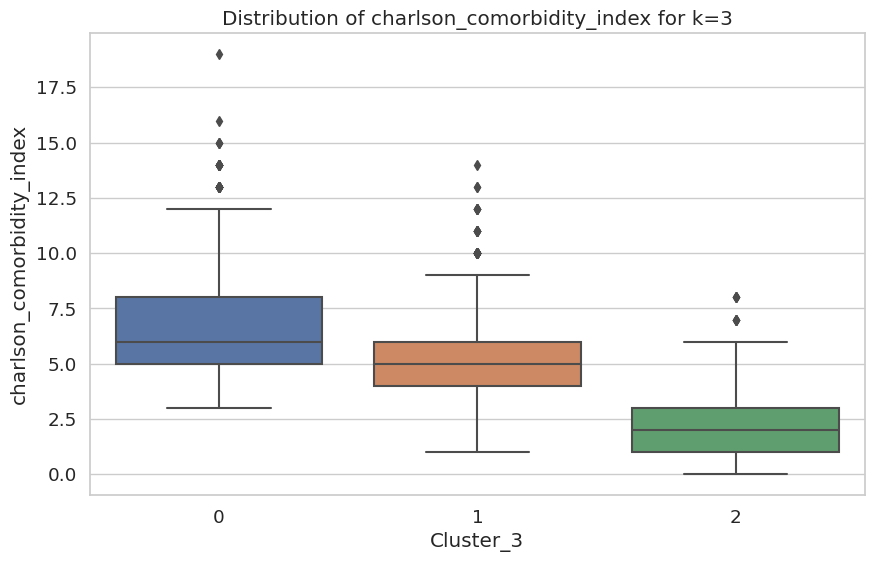

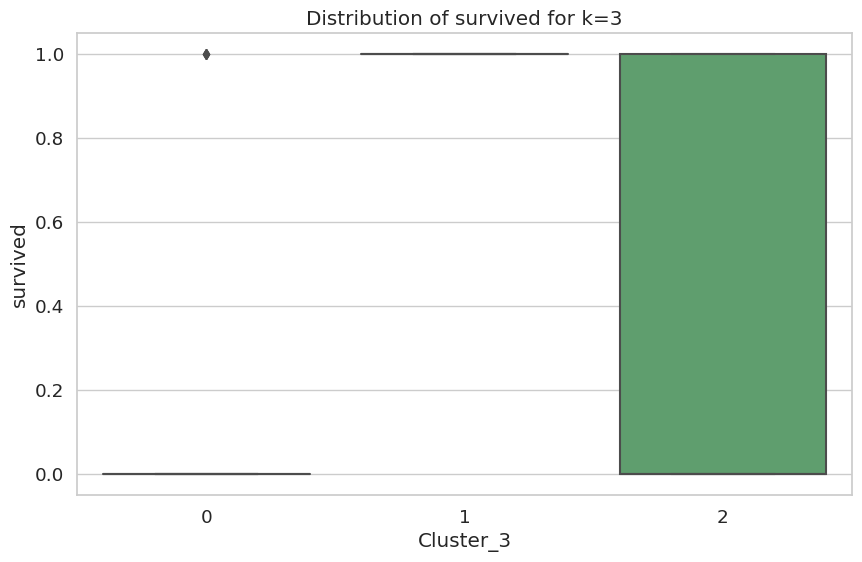

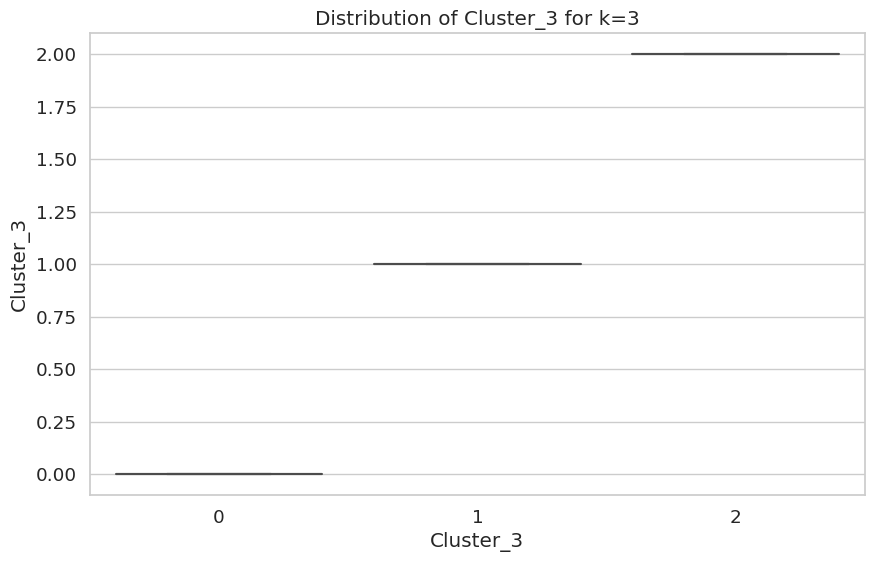

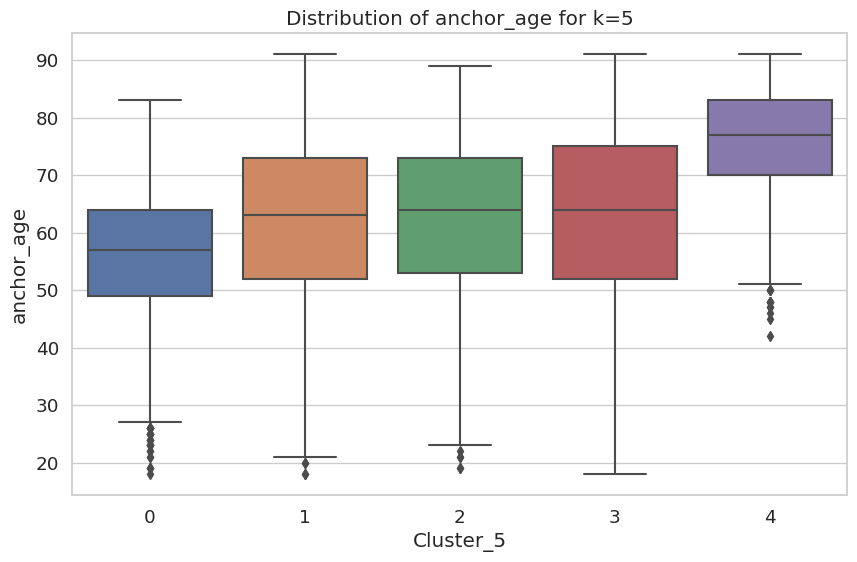

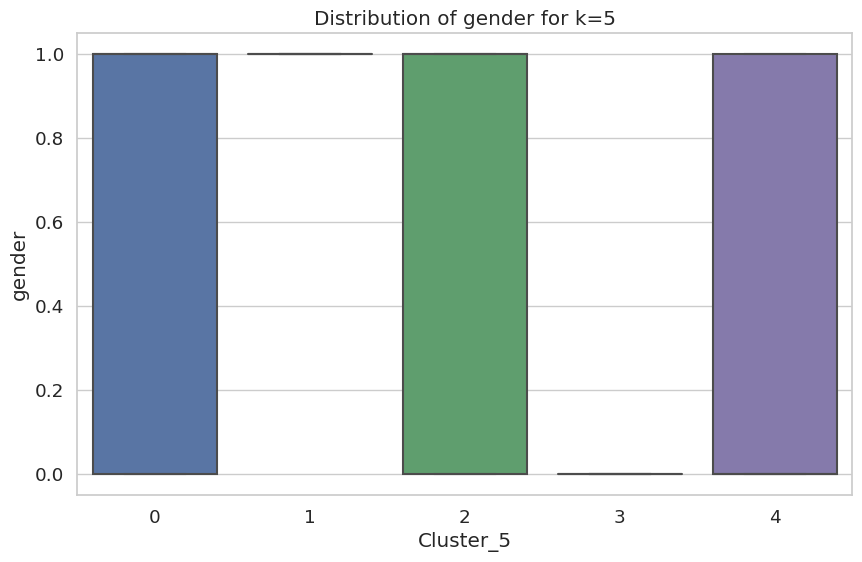

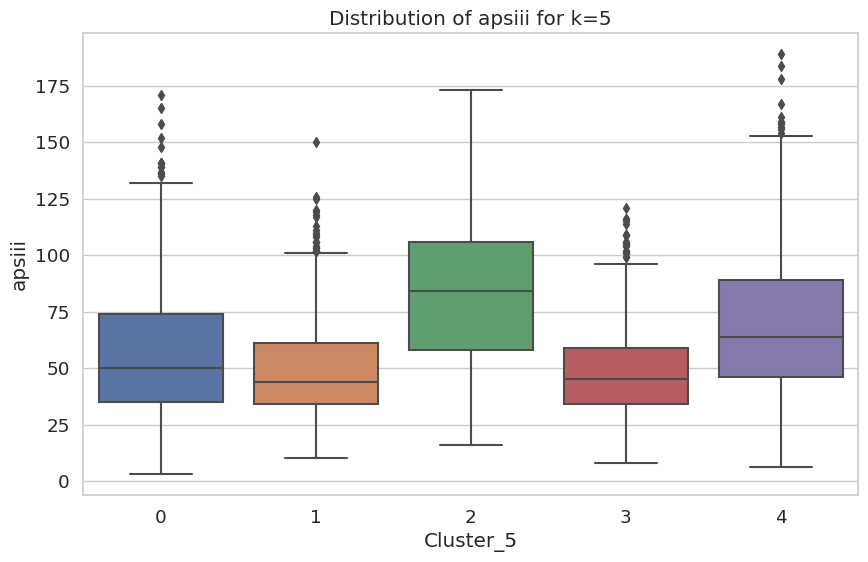

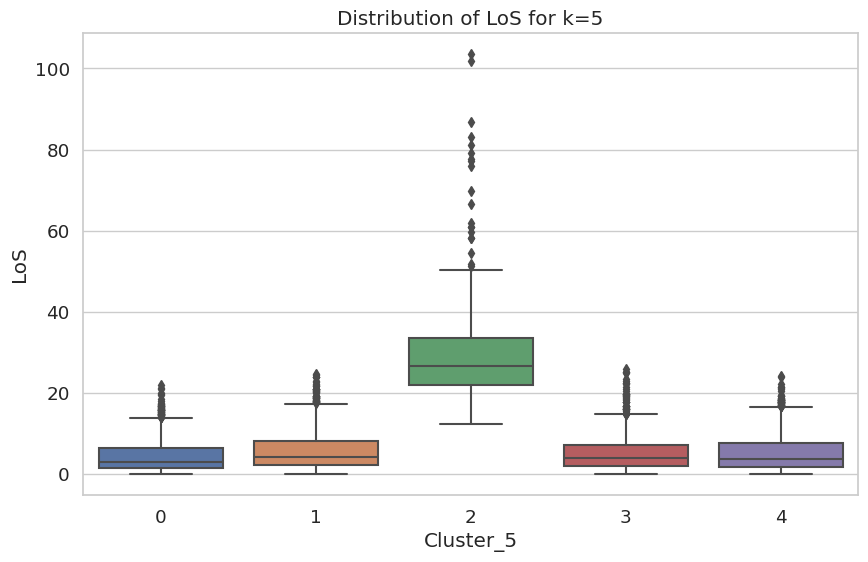

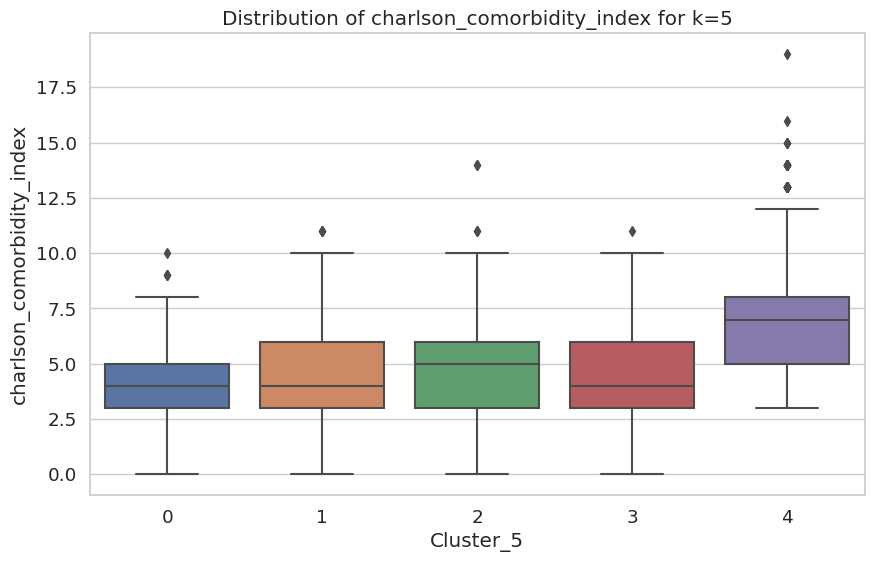

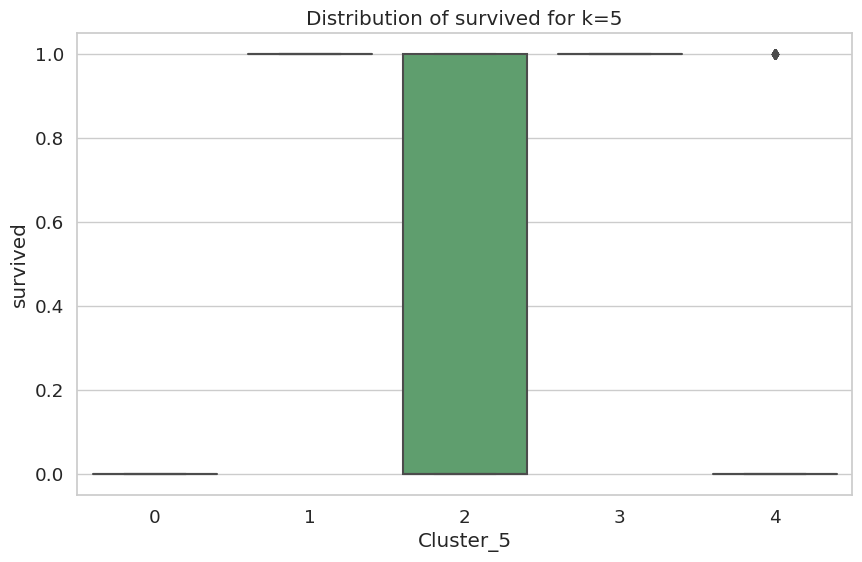

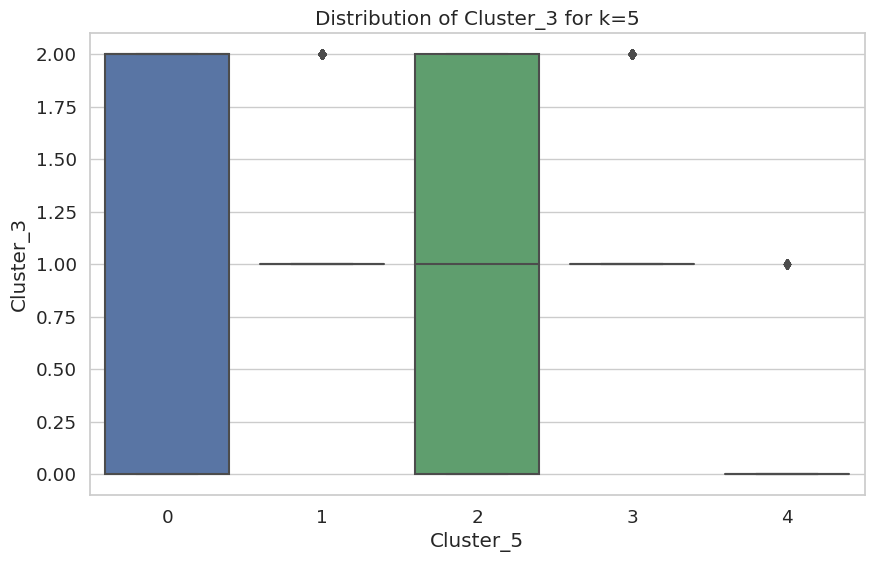

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

for k in k_values:
    for column in cohort_df.columns[:-1]:  # Exclude the cluster label columns
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=f'Cluster_{k}', y=column, data=cohort_df)
        plt.title(f'Distribution of {column} for k={k}')
        plt.show()


#Q3 Property differences between the clusters

In examining the cluster properties derived from our patient cohort, several key characteristics stand out:

**1. Age Distribution:**

In the 3-cluster model, the first cluster predominantly contains older individuals with a mean age close to 73, while the third cluster comprises younger individuals with an average age of 46.
The 5-cluster model expands upon this. Notably, the fourth cluster in this model predominantly captures very elderly patients with a mean age of approximately 76, while the first cluster zeroes in on mid-aged patients around 55.

**2. Gender Distribution:**

The 5-cluster model reveals more distinct patterns in gender. For instance, the second cluster consists solely of one gender, indicating a potentially significant differentiation based on gender in some patient outcomes or conditions.

**3. Inter-Cluster Comparisons:**

The transitions from the 3-cluster to the 5-cluster model showcase a granular stratification of the patient cohort. For example, the older population in the 3-cluster model gets further subdivided in the 5-cluster model, allowing for more detailed patient groupings.
Choosing between the 3 and 5 cluster models hinges on clinical goals:

The 3-cluster model provides a broader categorization. It might be preferred when trying to delineate major groups within a patient population for broader health policy decisions or general patient care strategies.
The 5-cluster model offers greater specificity, which could be invaluable for tailored clinical interventions or when designing detailed research studies.
In a medical context, such distinctions are essential. Age is a well-known factor that affects a myriad of physiological parameters and can be a determinant in disease susceptibility, progression, and patient outcomes. Gender, too, plays a pivotal role in medicine, with numerous diseases manifesting differently or having different prevalence rates between males and females.

In conclusion, our clustering analysis provides a comprehensive overview of patient groupings, vital for understanding patient outcomes. Future work should integrate more clinical parameters to discern if these clusters also demonstrate distinct medical trajectories or outcomes.